In [85]:
import numpy as np
import matplotlib.pylab as plt
from scipy import signal

In [55]:
fs = 8000

In [56]:
Omega = np.arange(0,np.pi,0.01)

In [57]:
f = Omega * fs / (2*np.pi)

In [58]:
def Mag(Omega):
    return np.abs(0.2 + 0.3742*np.cos(Omega))

In [59]:
mag = Mag(Omega)

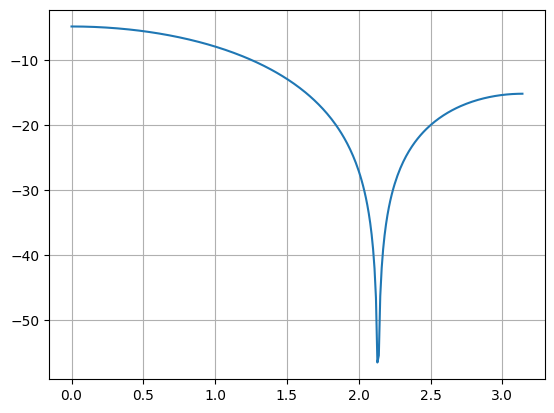

In [60]:
plt.plot(Omega, 20*np.log10(mag))
plt.grid()

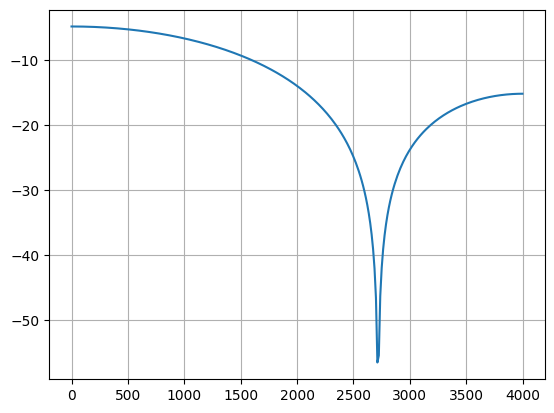

In [61]:
plt.plot(f, 20*np.log10(mag))
plt.grid()

In [64]:
deg = -Omega * 180 / np.pi

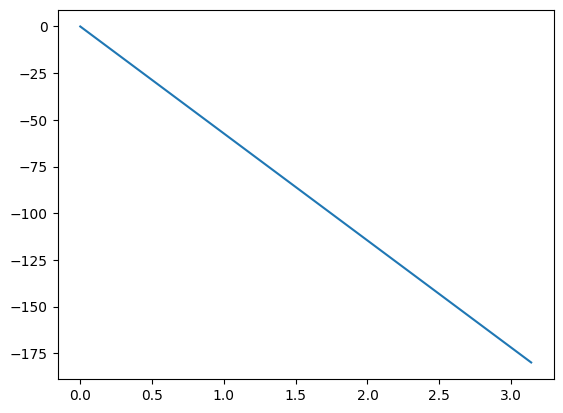

In [65]:
plt.plot(Omega, deg)

In [67]:
def New_Mag(Omega):
    R = 0.1871 + 0.2*np.cos(Omega) + 0.1871*np.cos(2*Omega)
    I = 0.2*np.sin(Omega) + 0.1871*np.sin(2*Omega)
    return np.sqrt(R**2 + I**2)

In [79]:
def New_Phase(Omega):
    R = 0.1871 + 0.2*np.cos(Omega) + 0.1871*np.cos(2*Omega)
    I = 0.2*np.sin(Omega) + 0.1871*np.sin(2*Omega)
    return np.arctan(-I/R)

In [68]:
new_mag = New_Mag(Omega)

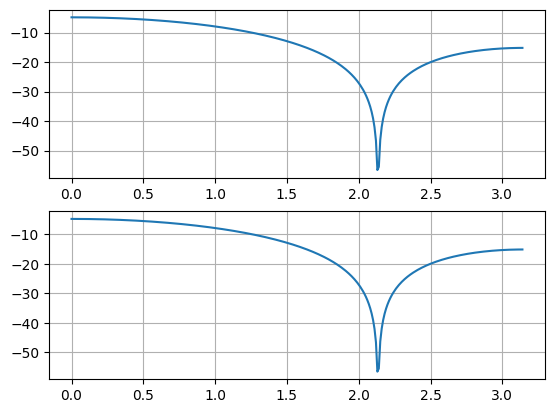

In [73]:
plt.figure()
plt.subplot(211)
plt.plot(Omega, 20*np.log10(mag))
plt.grid()
plt.subplot(212)
plt.plot(Omega, 20*np.log10(new_mag))
plt.grid()

In [83]:
np.min(new_mag)

0.0014826574614941201

In [80]:
phase = New_Phase(Omega)

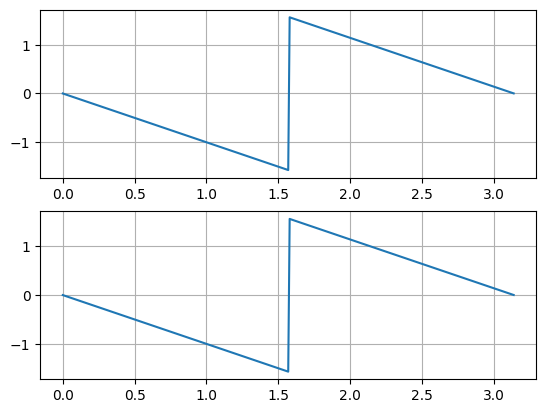

In [81]:
plt.figure()
plt.subplot(211)
plt.plot(Omega, phase)
plt.grid()
plt.subplot(212)
plt.plot(Omega, phase)
plt.grid()

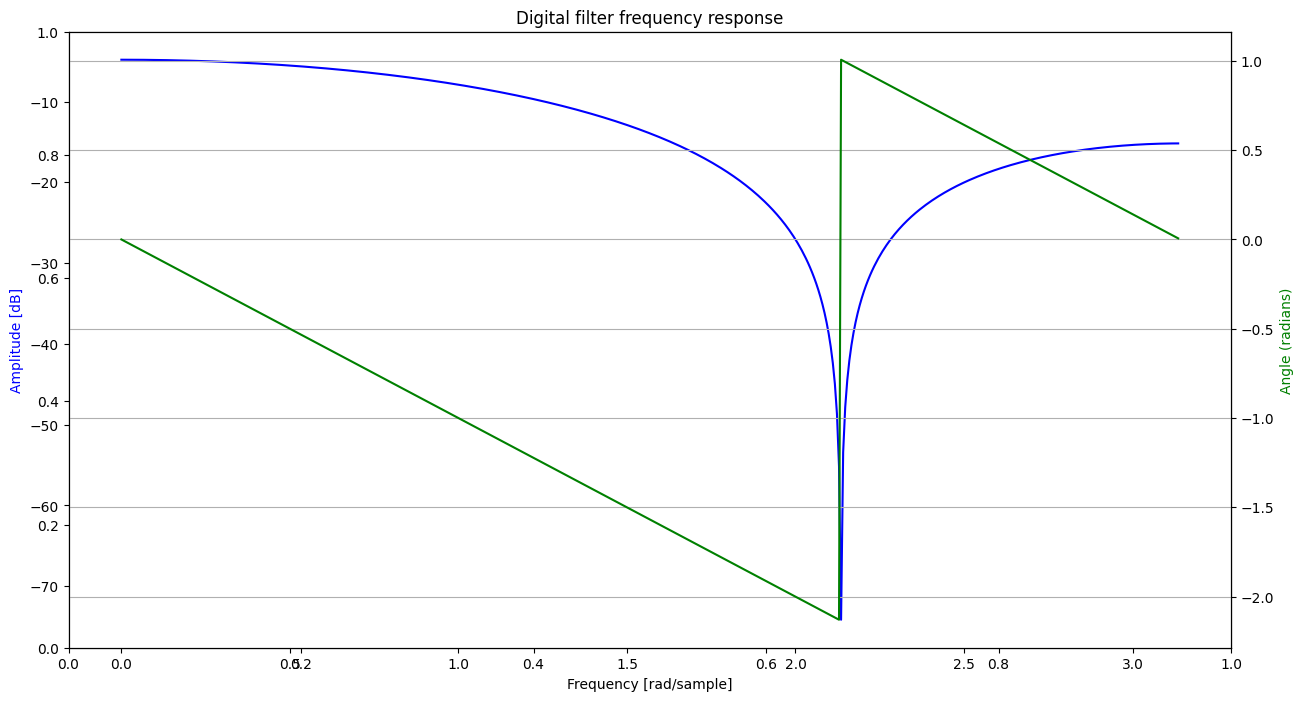

In [94]:
w, h = signal.freqz([0.1871, 0.2, 0.1871])
fig = plt.figure(figsize=(15,8))
plt.title('Digital filter frequency response')
ax1 = fig.add_subplot(111)
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.show()